In [1]:
import numpy as np
import pandas as pd

import rpy2.rinterface
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()

In [2]:
%load_ext rpy2.ipython

First we have to load in the R scripts that simulate the more involved data sets.

In [3]:
%%R 
source("sim.R")
r_df <- sim(n=1000, het_linear=TRUE)

Now we have to transform the R DataFrame to a pandas DataFrame.

In [4]:
r_df = ro.r('r_df')
with localconverter(ro.default_converter + pandas2ri.converter):
  df = ro.conversion.rpy2py(r_df)
df.head()

,Y0,Y1,X,D,Y_obs,IntXD,CATE,trueps,pslog,psprob,tauihat,tauhatknn
1,3.209791,9.304881,0.508610,0,3.209791,0.000000,5.017220,0.5,0.493000,0.493000,3.826192,4.460967
2,2.577199,5.205330,0.334021,1,5.205330,0.334021,4.668043,0.5,0.493002,0.493002,3.481503,4.572274
3,3.939302,9.387575,0.991925,0,3.939302,0.000000,5.983850,0.5,0.492995,0.492995,5.429646,5.472601
4,1.491655,9.015605,0.587689,1,9.015605,0.587689,5.175378,0.5,0.492999,0.492999,5.818102,4.985984
5,1.704818,5.805499,0.121394,0,1.704818,0.000000,4.242788,0.5,0.493004,0.493004,3.910265,4.216130


At last we will construct pandas DataFrames and Series for y, X and D

In [5]:
y = (df['D'] * df['Y1'] + (1 - df['D']) * df['Y0'])
X = (df['X'])
D = (df['D'])

In [6]:
import CausalTree as ct
from CausalTree import *

In [7]:
ctree_sparse, ctree_opt = ct.CausalTree.apply_kFold_CV(X, y, D)

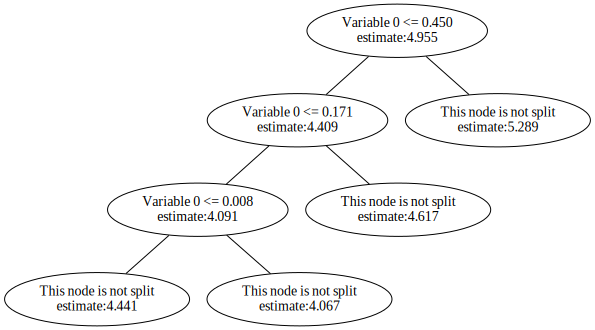

In [8]:
ctree_sparse.plot()

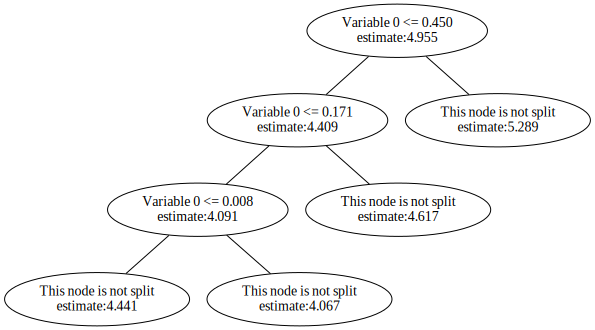

In [9]:
ctree_opt.plot()

In [10]:
ctree_sparse

Causal Tree; fitted = True; id = 140257757578744

In [11]:
tau_hat = ctree_sparse.predict(X)
tau_real = df['CATE']